In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# for ANN
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
df=pd.read_csv("/content/Churn_Modelling.csv")             # importing the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Dropping unwanted columns

df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [59]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2961,616,Spain,Male,31,7,76665.71,2,1,1,163809.08,0
6984,588,France,Male,44,8,154409.74,1,1,0,49324.03,1


In [60]:
df.shape

(10000, 11)

In [61]:
col_names=df.columns         # Display columns of the dataset
col_names

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [62]:
df.info()     # Display Summary and dimension of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### checking the unique values inside each feature

In [63]:
# clculating proportion of customers from each country

df['Geography'].value_counts(normalize=True).mul(100)

,proportion
Geography,
France,50.14
Germany,25.09
Spain,24.77


Most of the customers are from France.

In [64]:
# clculating proportion of Male and Female customers

df['Gender'].value_counts(normalize=True).mul(100)

,proportion
Gender,
Male,54.57
Female,45.43


In [65]:
# clculating proportion of customers age

df['Age'].value_counts(normalize=True).mul(100).sort_index()

,proportion
Age,
18,0.22
19,0.27
20,0.40
21,0.53
22,0.84
...,...
83,0.01
84,0.02
85,0.01


In [66]:
age_percentages = df['Age'].value_counts(normalize=True).mul(100).sort_index()

# Finding the index (age) with the maximum value
max_age_group = age_percentages.idxmax()

# Finding the maximum percentage
max_percentage = age_percentages.max()

print(f"The age with the maximum number of customers is: {max_age_group}")
print(f"Percentage of customers at this age: {max_percentage:.2f}%")

The age with the maximum number of customers is: 37
Percentage of customers at this age: 4.78%


In [67]:
# clculating proportion of customers tenure(in years) with the bank

df['Tenure'].value_counts(normalize=True).mul(100).sort_index()

,proportion
Tenure,
0,4.13
1,10.35
2,10.48
3,10.09
4,9.89
5,10.12
6,9.67
7,10.28
8,10.25


In [68]:
# proportion of bank balance

df['Balance'].value_counts(normalize=True).mul(100).sort_index()

,proportion
Balance,
0.00,36.17
3768.69,0.01
12459.19,0.01
14262.80,0.01
16893.59,0.01
...,...
216109.88,0.01
221532.80,0.01
222267.63,0.01


In [69]:
# proportion of customers bank product ownership

df["NumOfProducts"].value_counts(normalize=True).mul(100).sort_index()

,proportion
NumOfProducts,
1,50.84
2,45.90
3,2.66
4,0.60


In [70]:
# proportion of customers with and without credit card ownership

df["HasCrCard"].value_counts(normalize=True).mul(100)

,proportion
HasCrCard,
1,70.55
0,29.45


In [71]:
# proportion of active and inactive customer

df["IsActiveMember"].value_counts(normalize=True).mul(100)

,proportion
IsActiveMember,
1,51.51
0,48.49


In [72]:
# proportion of churn customers

df["Exited"].value_counts(normalize=True).mul(100)

,proportion
Exited,
0,79.63
1,20.37


In [73]:
# proportion of male and female customers from each country

df[['Geography','Gender']].value_counts(normalize=True).mul(100)

Geography  Gender
France     Male      27.53
           Female    22.61
Spain      Male      13.88
Germany    Male      13.16
           Female    11.93
Spain      Female    10.89
Name: proportion, dtype: float64

### Checking data distribution

In [74]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [75]:
df.describe(include=object).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


### Checking for duplicates

In [76]:
df.duplicated().sum()   # no duplicated values in dataset

np.int64(0)

### Checking for null values

In [77]:
df.isnull().sum()          # no null values in the dataset

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [78]:
df.shape

(10000, 11)

### Visualizing feature distributions

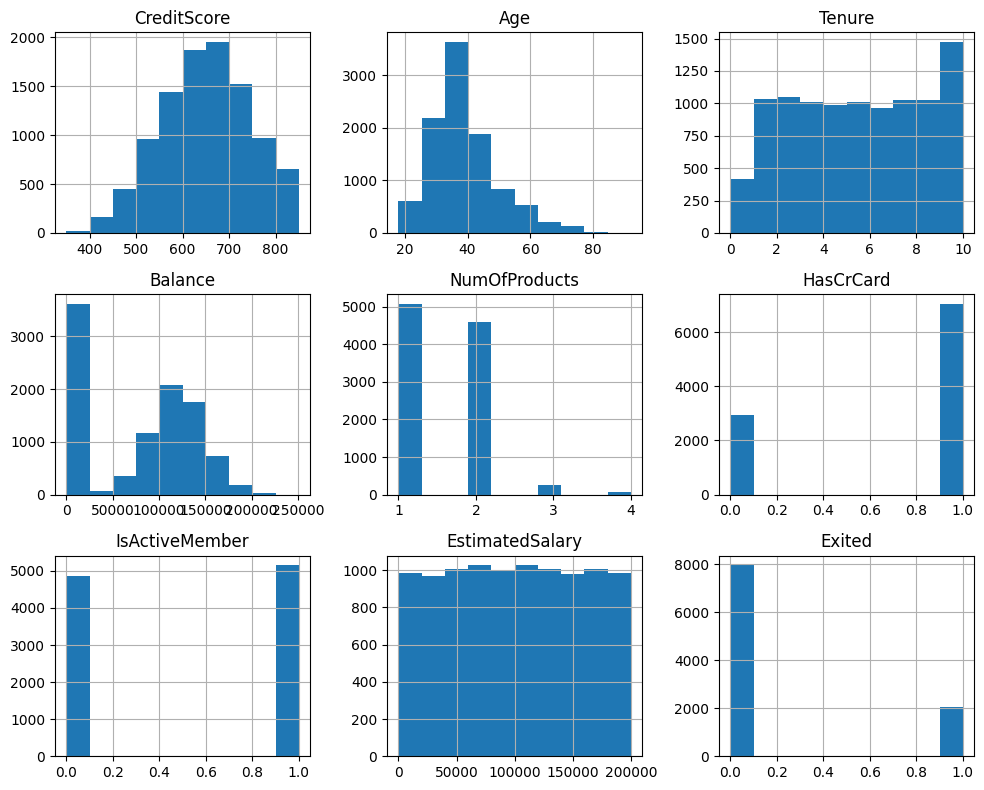

In [79]:
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

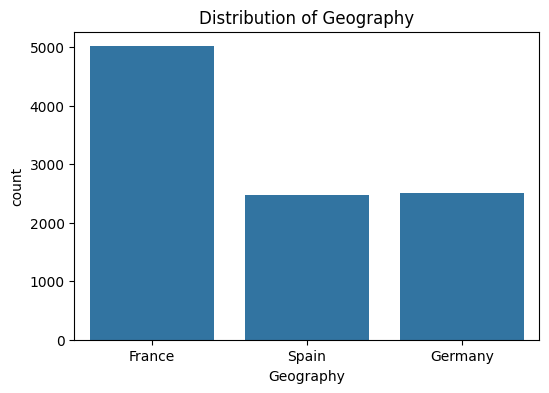

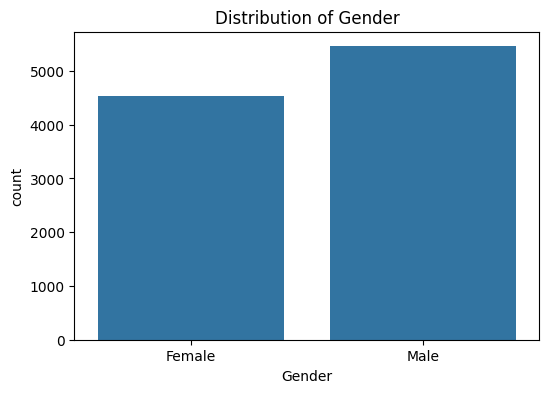

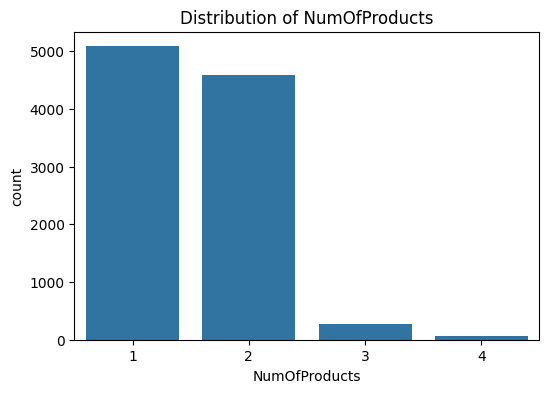

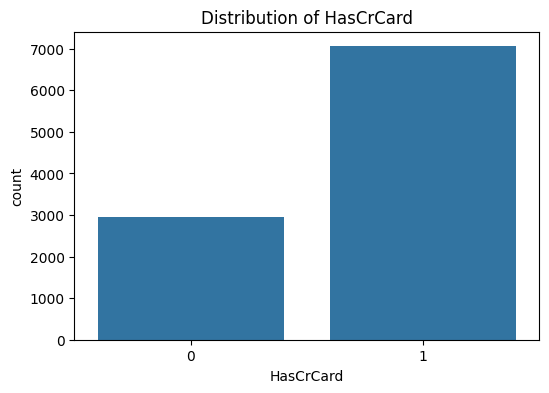

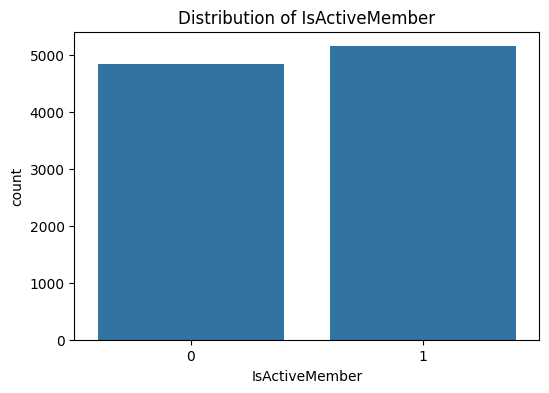

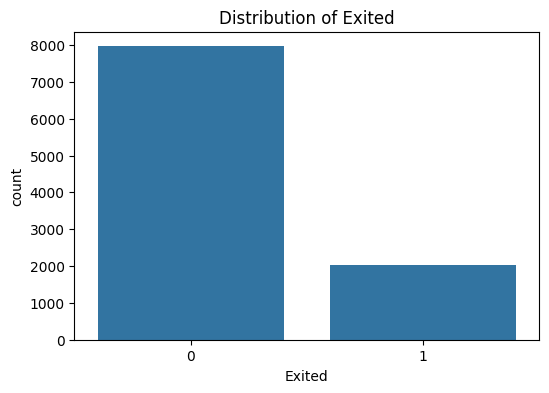

In [80]:
# Bar plots for categorical features
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

The majority of customers are from France, followed by Germany and Spain. There appears to be a slightly higher number of male customers than female customers. Most customers use one or two products and there are fewer customers with three or four products. The majority of customers have a credit card. There's a relatively even split between active and inactive members.
The target variable distribution shows that a smaller proportion of customers have churned compared to those who haven't. This indicates an imbalanced dataset.

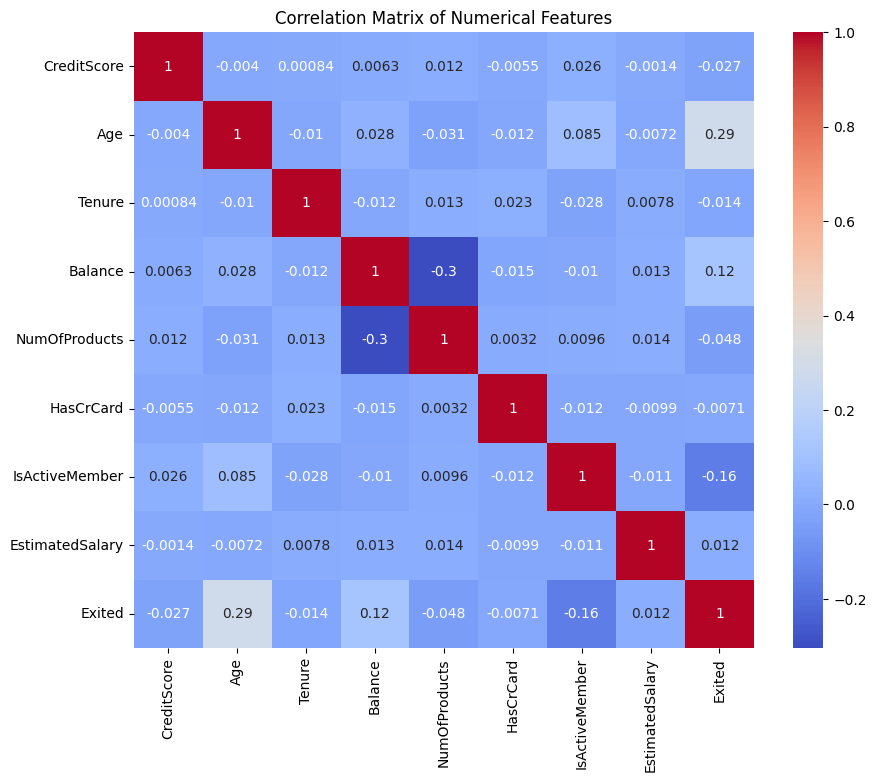

In [81]:
# Analyzing relationships between features
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

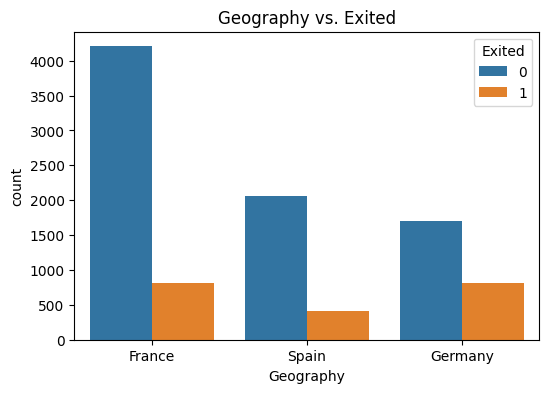

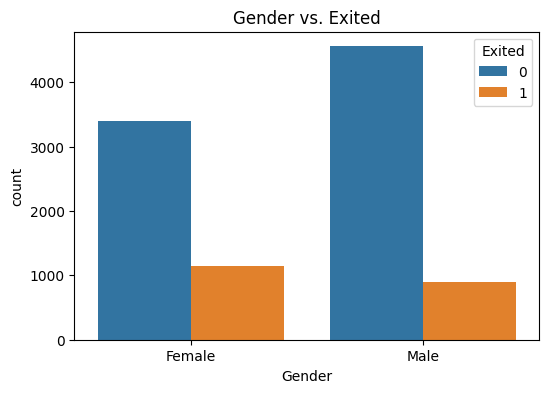

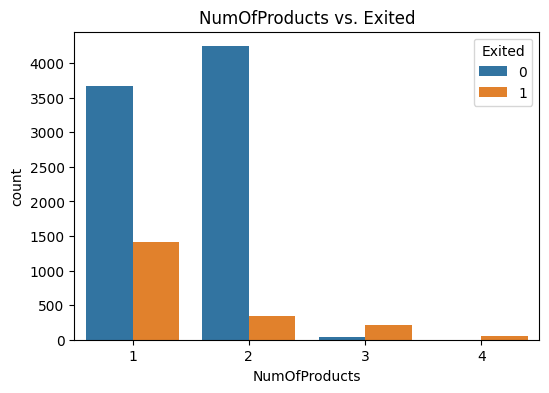

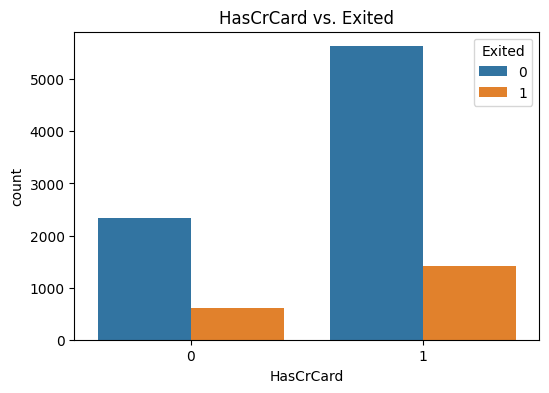

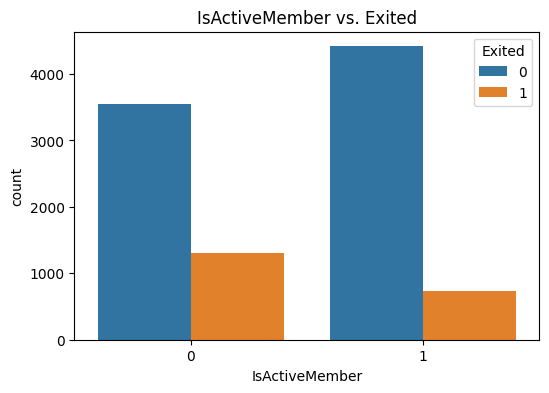

In [82]:
# Relationship between categorical features and the target variable (Exited)
for col in ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} vs. Exited')
    plt.show()

Churn rates seem to be higher in Germany compared to France and Spain. There appears to be a slightly higher churn rate among female customers than male customers. Customers with 3 or 4 products have a significantly higher churn rate than those with 1 or 2 products. This is a strong indicator that offering too many products might be a churn driver. Inactive members are more likely to churn than active members. This supports the intuition that active engagement with the bank reduces churn.

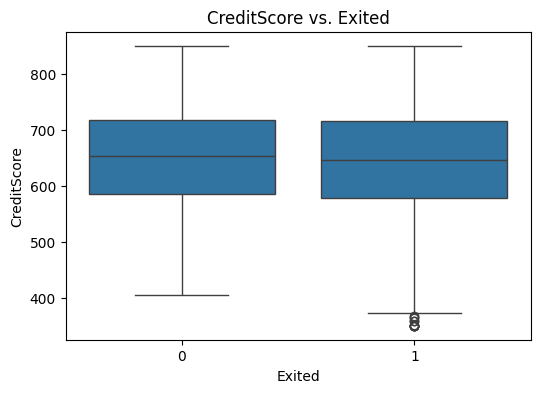

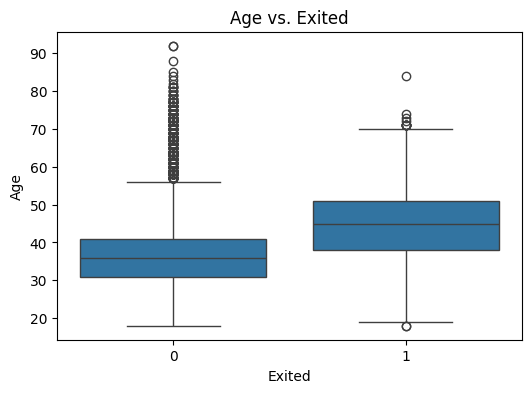

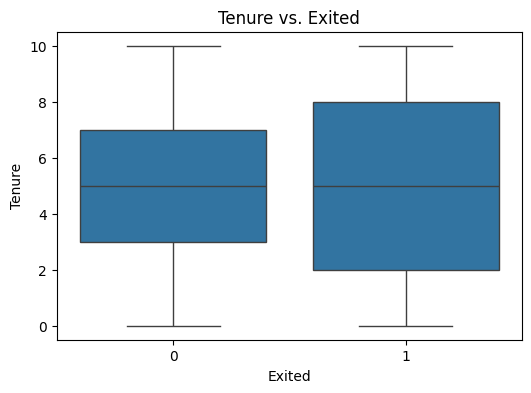

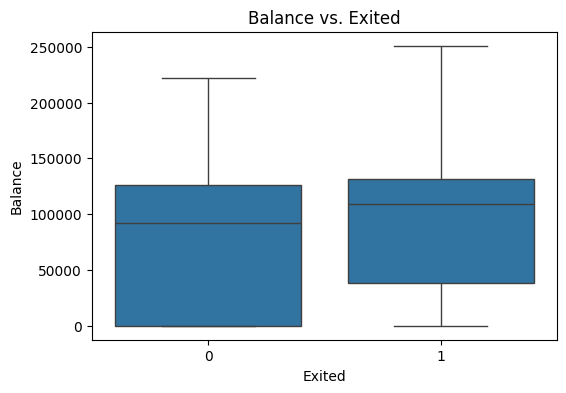

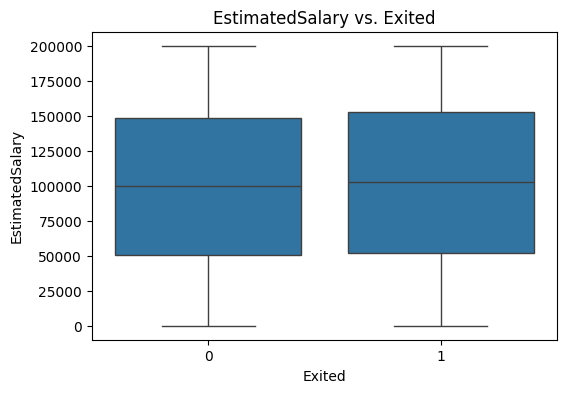

In [83]:
# Distribution of numerical features for churned vs. non-churned customers
for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs. Exited')
    plt.show()

Churned customers tend to be older than non-churned customers. The boxplot shows a higher median age and a wider spread for the churned group. Churned customers tend to have higher bank balances than non-churned customers. Tenure, and Estimated Salary, Creditscore do not show a strong relation with churn in the plots.

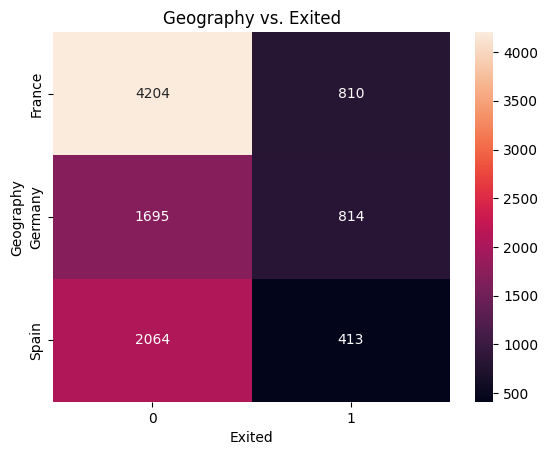

In [88]:
# create cross table
table = pd.crosstab(df['Geography'], df['Exited'])
sns.heatmap(table, annot=True,  fmt='g')
plt.title('Geography vs. Exited')
plt.show()

### Data Preprocessing

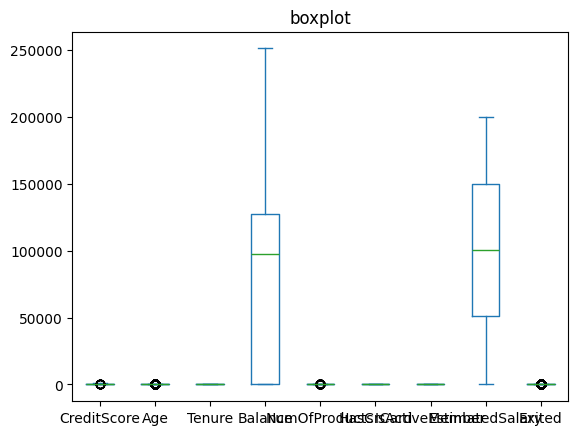

In [85]:
# outlier detection
ax = df[numerical_cols].plot(kind='box', title='boxplot')

# Display the plot
plt.show()                                   # before removing outliers

In [86]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5093,650,Germany,Female,55,2,140891.46,3,1,1,179834.45,1
9644,452,France,Female,35,8,0.00,2,1,1,149614.81,0


In [87]:
df1=df.copy()

In [89]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [90]:
df['Exited'].value_counts()      # Imbalanced dataset

,count
Exited,
0,7963
1,2037


In [93]:
# Balancing the imbalanced data set

df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class
                                 random_state=42)  # For reproducibility

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the rows of the dataset
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [94]:
df['Exited'].value_counts()           # Balanced the dataset

,count
Exited,
0,7963
1,7963


In [95]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9272,850,Spain,Male,35,7,110349.82,1,0,0,126355.80,0
12051,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1


In [96]:
# onehot on Geography column
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [97]:
# let's split data
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape,sep='\n')

(12740, 11)
(3186, 11)
(12740,)
(3186,)


### ANN model building and training

In [110]:
# Build the model
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(units=256, activation='relu', input_dim = 11))
model.add(Dropout(0.2))

# Additional hidden layers based on best hyperparameters
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Change to 'softmax' for multi-class classification

In [111]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])

In [112]:
# define early stopping
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)
# Train model
history = model.fit(X_train, y_train,epochs=500,
 validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6280 - loss: 0.6550 - val_accuracy: 0.7511 - val_loss: 0.5057
Epoch 2/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7507 - loss: 0.5097 - val_accuracy: 0.7627 - val_loss: 0.4756
Epoch 3/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7650 - loss: 0.4852 - val_accuracy: 0.7765 - val_loss: 0.4601
Epoch 4/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7665 - loss: 0.4820 - val_accuracy: 0.7809 - val_loss: 0.4526
Epoch 5/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7793 - loss: 0.4662 - val_accuracy: 0.7841 - val_loss: 0.4476
Epoch 6/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7795 - loss: 0.4645 - val_accuracy: 0.7844 - val_loss: 0.4483
Epoch 7/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7781 - loss: 0.4564 - val_accuracy: 0.7828 - val_loss: 0.4437
Epoch 8/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7872 - loss: 0.4466 - val_accu

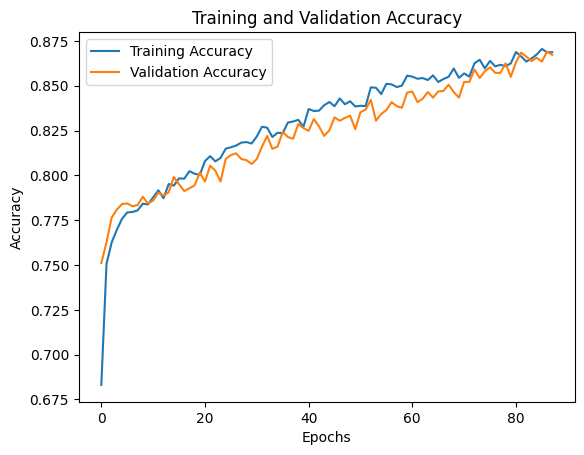

In [113]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

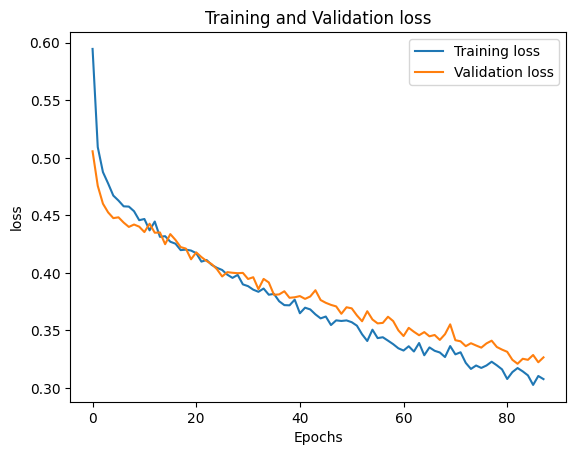

In [114]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Prediction and Evaluation

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1582
           1       0.84      0.91      0.87      1604

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



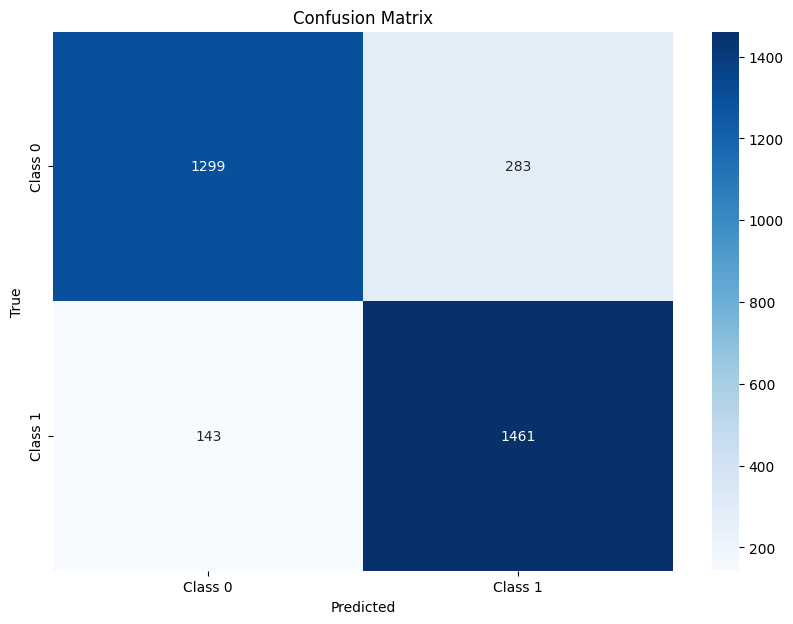

In [115]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()